# Data visualization

In [43]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [74]:
el2022 = pd.read_csv('data/electricity-production and consumption_2022.csv',  delimiter=';',decimal=',')
el2022['timestamp'] = pd.to_datetime(el2022['Kuupaev (Eesti aeg)'], dayfirst=True)

consumption = el2022[['timestamp', 'Tarbimine']]
consumption.set_index('timestamp', inplace=True)
consumption = consumption.rename(columns = {'Tarbimine':'value'})

consumption.head()

,value
timestamp,
2022-01-01 00:00:00,899.4
2022-01-01 01:00:00,892.1
2022-01-01 02:00:00,874.3
2022-01-01 03:00:00,860.1
2022-01-01 04:00:00,842.7


## Line charts

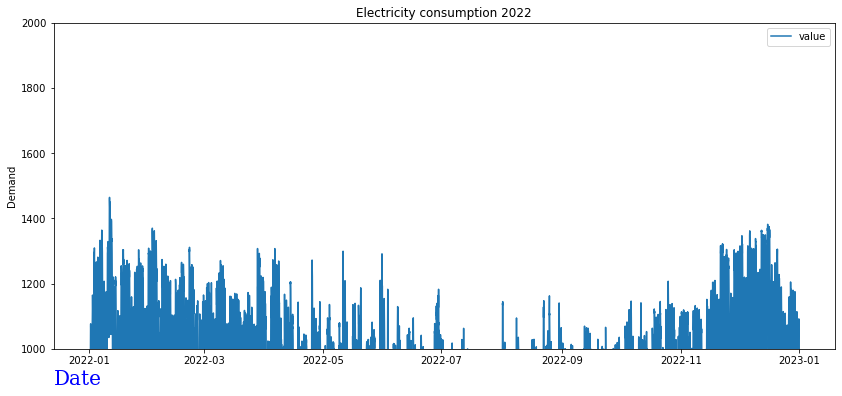

In [80]:
plt.figure(figsize=(14,6))

plt.title("Electricity consumption 2022")
plt.xlabel("Date", fontdict ={'family':'serif','color':'blue','size':20}, loc = 'left')
plt.ylabel("Demand")

plt.ylim(1000, 2000)

sns.lineplot(data=consumption);
plt.savefig("demand.pdf") 


## Bar chart

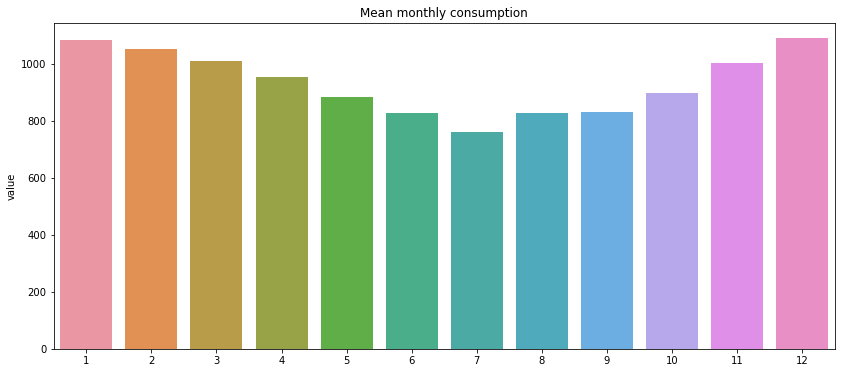

In [81]:
plt.figure(figsize=(14,6))

plt.title("Mean monthly consumption")
sns.barplot(x = np.arange(1,13),
            y = consumption['value'].groupby(pd.Grouper(freq = 'M')).mean());

## Box plot

https://www.simplypsychology.org/boxplots.html

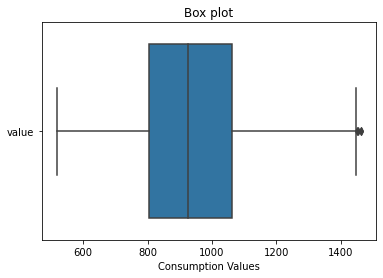

In [82]:
import seaborn as sns
ax = sns.boxplot(data=consumption[['value']], orient="h")#, palette="Set2")
plt.title('Box plot')
plt.xlabel('Consumption Values')
plt.show()

## Distribution plots

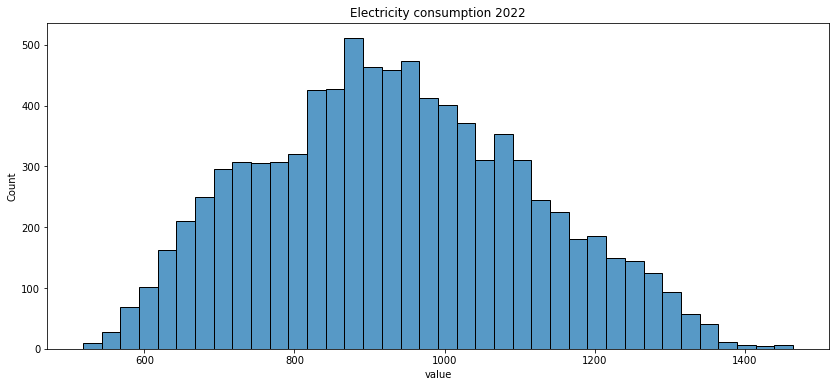

In [83]:
plt.figure(figsize=(14,6))

plt.title("Electricity consumption 2022")
sns.histplot(consumption['value']);

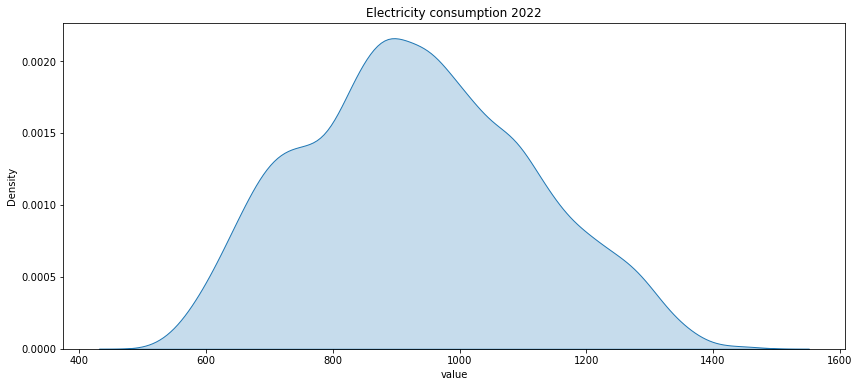

In [84]:
#kernel density estimate (KDE) plot -- smoothed histogram
plt.figure(figsize=(14,6))

plt.title("Electricity consumption 2022")
sns.kdeplot(data=consumption['value'], shade=True);

In [86]:
consumption['ts'] = pd.to_datetime(consumption.index.values, dayfirst=True)
consumption['wd'] = consumption['ts'].dt.dayofweek
consumption['h'] = consumption['ts'].dt.hour

def is_weekend(d):
    if d.weekday() > 5:
        return True
    else:
        return False
    
consumption['weekday'] = consumption.apply(lambda x: is_weekend(x['ts']), axis=1)
consumption

,value,ts,wd,h,weekday
timestamp,,,,,
2022-01-01 00:00:00,899.4,2022-01-01 00:00:00,5,0,False
2022-01-01 01:00:00,892.1,2022-01-01 01:00:00,5,1,False
2022-01-01 02:00:00,874.3,2022-01-01 02:00:00,5,2,False
2022-01-01 03:00:00,860.1,2022-01-01 03:00:00,5,3,False
2022-01-01 04:00:00,842.7,2022-01-01 04:00:00,5,4,False
...,...,...,...,...,...
2022-12-31 19:00:00,989.4,2022-12-31 19:00:00,5,19,False
2022-12-31 20:00:00,932.5,2022-12-31 20:00:00,5,20,False
2022-12-31 21:00:00,889.5,2022-12-31 21:00:00,5,21,False


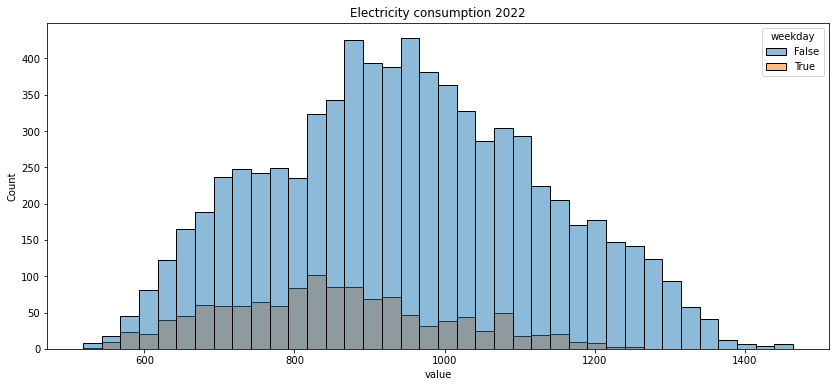

In [87]:
plt.figure(figsize=(14,6))

plt.title("Electricity consumption 2022")

sns.histplot(data=consumption, x='value', hue='weekday');



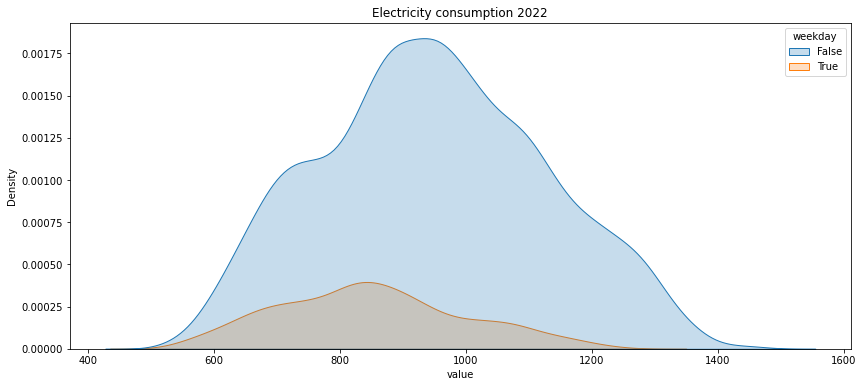

In [88]:
plt.figure(figsize=(14,6))

plt.title("Electricity consumption 2022")
sns.kdeplot(data=consumption, x='value', hue='weekday', shade=True);


## Scatter plot

In [89]:
consumption_lag7 = consumption[['value']].shift(24*7)
consumption_lag7 = consumption_lag7.rename(columns = {'value':'lag7'})
consumption = consumption.join(consumption_lag7)

consumption_lag2 = consumption[['value']].shift(24*2)
consumption_lag2 = consumption_lag2.rename(columns = {'value':'lag2'})
consumption = consumption.join(consumption_lag2)

consumption_lag14 = consumption[['value']].shift(24*7*2)
consumption_lag14 = consumption_lag14.rename(columns = {'value':'lag14'})
consumption = consumption.join(consumption_lag14)
consumption

,value,ts,wd,h,weekday,lag7,lag2,lag14
timestamp,,,,,,,,
2022-01-01 00:00:00,899.4,2022-01-01 00:00:00,5,0,False,NaN,NaN,NaN
2022-01-01 01:00:00,892.1,2022-01-01 01:00:00,5,1,False,NaN,NaN,NaN
2022-01-01 02:00:00,874.3,2022-01-01 02:00:00,5,2,False,NaN,NaN,NaN
2022-01-01 03:00:00,860.1,2022-01-01 03:00:00,5,3,False,NaN,NaN,NaN
2022-01-01 04:00:00,842.7,2022-01-01 04:00:00,5,4,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,989.4,2022-12-31 19:00:00,5,19,False,1009.5,1105.1,1224.3
2022-12-31 20:00:00,932.5,2022-12-31 20:00:00,5,20,False,982.7,1077.0,1206.6
2022-12-31 21:00:00,889.5,2022-12-31 21:00:00,5,21,False,965.4,1031.4,1169.3


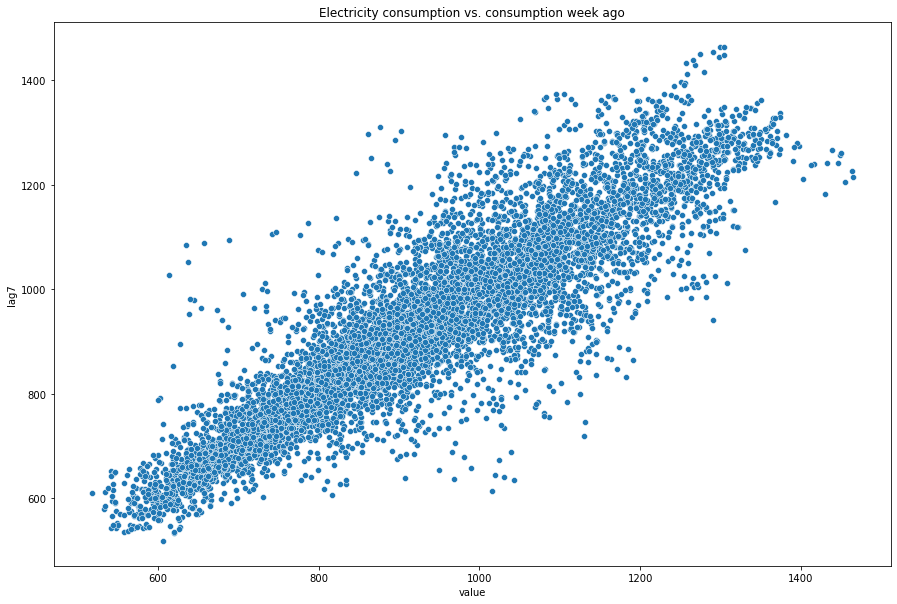

In [90]:
plt.figure(figsize=(15,10))

plt.title("Electricity consumption vs. consumption week ago")
sns.scatterplot(x=consumption['value'], y=consumption['lag7']);

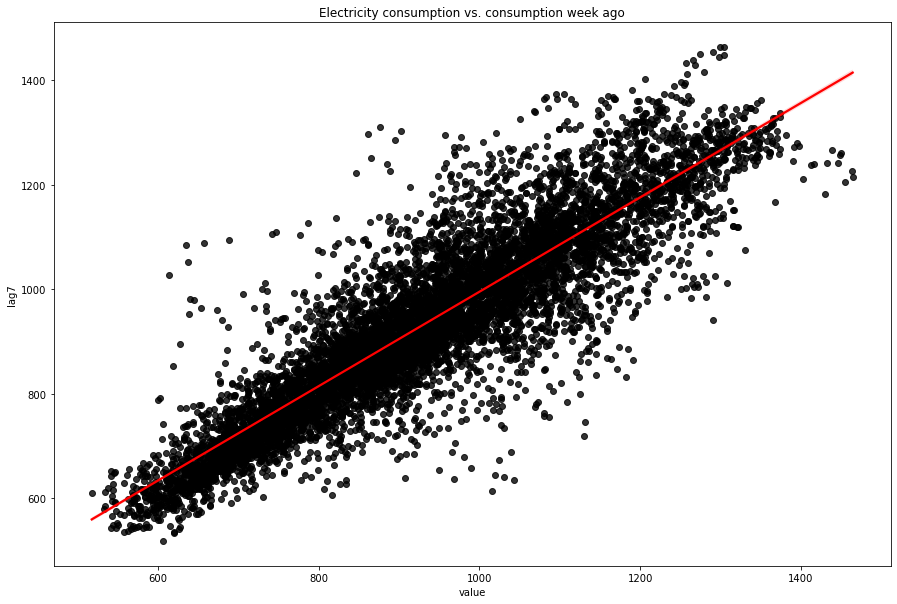

In [91]:
plt.figure(figsize=(15,10))

plt.title("Electricity consumption vs. consumption week ago")
sns.regplot(x=consumption['value'], y=consumption['lag7'],
           scatter_kws={"color": "black"}, line_kws={"color": "red"});

In [92]:
raw_weather = pd.read_csv('data/weather_2022.csv',  delimiter=';', decimal='.', index_col = False)
raw_weather['timestamp'] = pd.to_datetime(raw_weather['Local time in Tallinn (airport)'], dayfirst=True)
temperature = raw_weather[['timestamp', 'T']]
temperature.set_index('timestamp', inplace=True)
consumption = consumption.join(temperature)

consumption = consumption.reset_index().drop_duplicates(subset='timestamp', keep='last').set_index('timestamp')

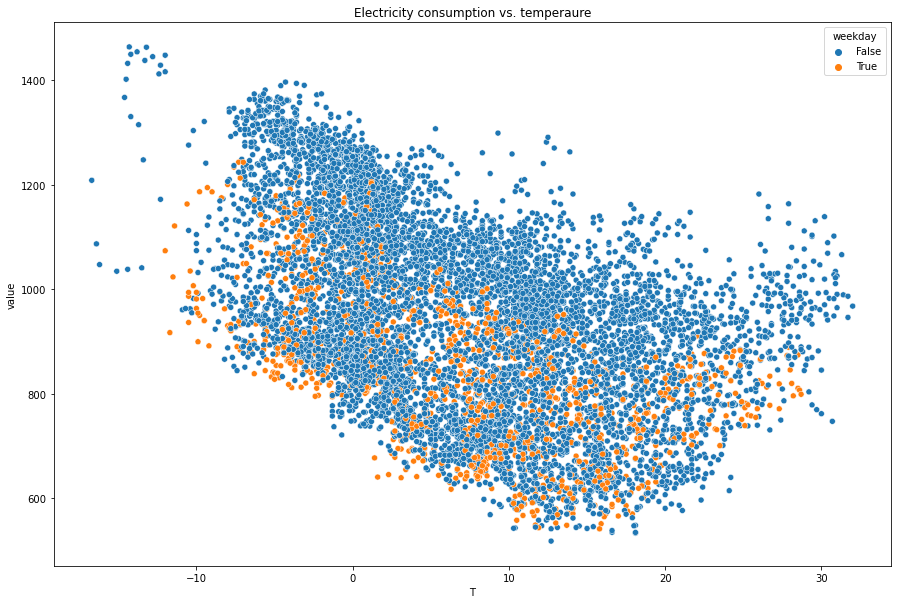

In [93]:
plt.figure(figsize=(15,10))

plt.title("Electricity consumption vs. temperaure")
sns.scatterplot(x=consumption['T'], y=consumption['value'], hue=consumption['weekday']);

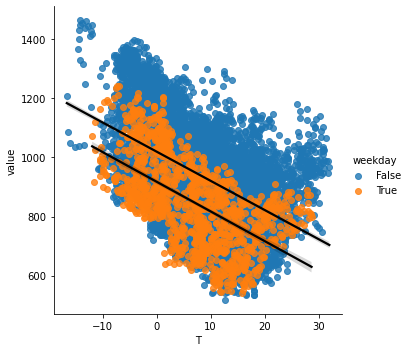

In [94]:
sns.lmplot(x="T", y="value", hue="weekday", data=consumption, line_kws={"color": "black"});

## Heat map

In [95]:
consumption['sin_wd'] = np.sin(consumption['wd'])
consumption['cos_wd'] = np.cos(consumption['wd'])
consumption['sin_h'] = np.sin(consumption['h'])
consumption['cos_h'] = np.cos(consumption['h'])

In [97]:
consumption.corr()

,value,wd,h,weekday,lag7,lag2,lag14,T,sin_wd,cos_wd,sin_h,cos_h
value,1.000000,-2.291020e-01,3.749005e-01,-1.907370e-01,0.895063,0.777927,0.867594,-0.471681,1.767161e-01,-1.160249e-01,2.234935e-02,2.998724e-02
wd,-0.229102,1.000000e+00,2.167785e-17,6.102790e-01,-0.228644,0.199495,-0.229707,-0.010509,-6.539954e-01,-8.357878e-02,3.816244e-19,9.924282e-19
h,0.374900,2.167785e-17,1.000000e+00,-6.704892e-18,0.373355,0.374469,0.374004,0.117057,-3.358975e-17,-1.283917e-17,-9.237836e-02,-1.631834e-01
weekday,-0.190737,6.102790e-01,-6.704892e-18,1.000000e+00,-0.191797,0.040815,-0.197659,-0.020689,-1.596941e-01,4.742726e-01,-1.559752e-19,-1.489383e-18
lag7,0.895063,-2.286440e-01,3.733546e-01,-1.917975e-01,1.000000,0.753427,0.895455,-0.428932,1.751473e-01,-1.169548e-01,2.319986e-02,3.017307e-02
lag2,0.777927,1.994946e-01,3.744687e-01,4.081546e-02,0.753427,1.000000,0.719075,-0.444814,-1.202095e-01,-1.795932e-01,2.262845e-02,2.994651e-02
lag14,0.867594,-2.297069e-01,3.740035e-01,-1.976585e-01,0.895455,0.719075,1.000000,-0.401937,1.734430e-01,-1.224763e-01,2.379466e-02,3.068229e-02
T,-0.471681,-1.050946e-02,1.170568e-01,-2.068878e-02,-0.428932,-0.444814,-0.401937,1.000000,1.240229e-02,-3.755117e-02,-8.217962e-03,4.031783e-03
sin_wd,0.176716,-6.539954e-01,-3.358975e-17,-1.596941e-01,0.175147,-0.120209,0.173443,0.012402,1.000000e+00,-2.942372e-02,6.791783e-19,2.384408e-19
cos_wd,-0.116025,-8.357878e-02,-1.283917e-17,4.742726e-01,-0.116955,-0.179593,-0.122476,-0.037551,-2.942372e-02,1.000000e+00,2.469674e-20,-1.186151e-18


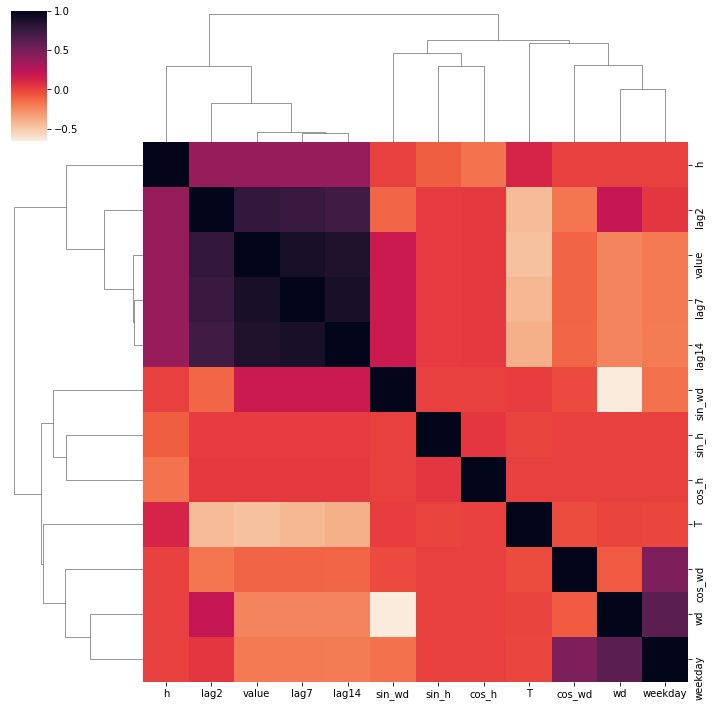

In [96]:
sns.clustermap(consumption.corr(), cmap="rocket_r");

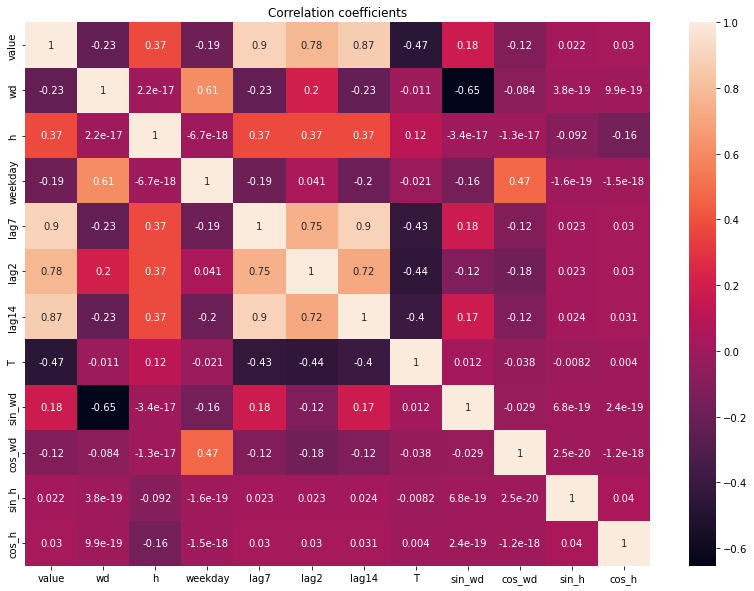

In [98]:
# Set the width and height of the figure
plt.figure(figsize=(14,10))

# Add title
plt.title("Correlation coefficients")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=consumption.corr(), annot=True);


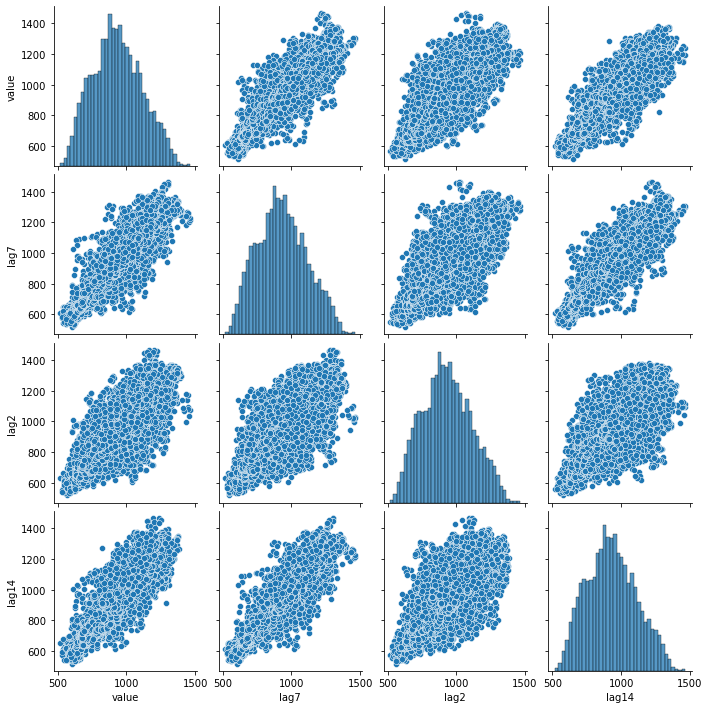

In [99]:
sns.pairplot(consumption[['value', 'lag7', 'lag2','lag14']]);